# STAT6104 Financial Time Series Assignments

## Content
<p>1. Introduction</p>
<p>2. Learning Outcomes</p>
<p>3. Assignment 3</p>
<p>4. Assignment 4</p>

## 1. Introduction

<p>This course includes statistical tools useful in analysing time series, models for stationary and non-stationary time series, seasonality, forecasting techniques, heteroskedasticity and multivariate time series.</p>

## 2. Learning Outcomes

<p>To get the procedure for time series anlysis and building models with the application of R.</p>

## 3. Assignment 3

<p>To select appropriate model for this data.</p>

In [5]:
###Question 10
#Data input
x<-c(1.33,-0.56,-1.31,-0.37,0.05,0.46,2.00,-0.19,-0.25,1.07,-0.17,1.14,0.63,-0.75,0.15,0.71,0.45,-0.14,0.57,1.43)

##Trial and error for FPE/AIC/BIC
IC=function(x,order.input=c(1,0,1)){
fit=arima(x,order=order.input);
n=length(x);p=order.input[1];q=order.input[3];sig=fit$sigma2
FPE=sig*(n+p)/(n-p);AIC=fit$ aic
BIC=(n-p-q)*log(n*sig/(n-p-1))+n*(1+log(sqrt(2*pi)))+
  (p+q)*log((sum(x^2)-n*sig)/(p+q)); return(c(FPE,AIC,BIC)) 
}

#Try ARMA(i,0,j) for i=1 to 5 and j=1 to 5
IC(x,order=c(1,0,1))
IC(x,order=c(2,0,2))
IC(x,order=c(3,0,3))
IC(x,order=c(4,0,4))
IC(x,order=c(5,0,5))

#Try AR(i,0) for i=1 to 5
IC(x,order=c(1,0,0))
IC(x,order=c(2,0,0))
IC(x,order=c(3,0,0))
IC(x,order=c(4,0,0))
IC(x,order=c(5,0,0))

#Try MA(0,j) j=1 to 5
IC(x,order=c(0,0,1))
IC(x,order=c(0,0,2))
IC(x,order=c(0,0,3))
IC(x,order=c(0,0,4))
IC(x,order=c(0,0,5))

[1]  0.51734 51.74169 28.61134

[1]  0.3895197 50.8203549 25.6627828

[1]  0.3013219 52.5775098 23.7453467

[1]  0.2183132 53.6643997 21.8726243

[1]  0.2734836 57.9445320 25.2851225

[1]  0.7087765 53.8733708 32.6190212

[1]  0.6877854 53.5390663 32.0997133

[1]  0.7607743 55.5236768 32.8930899

[1]  0.6118245 52.5120361 30.6616634

[1]  0.6788419 54.4225860 31.6844541

[1]  0.6375593 53.7866970 31.5183079

[1]  0.3296649 47.3595054 22.1513197

[1]  0.3193508 48.8204233 22.9391638

[1]  0.3112472 50.7759353 23.5747994

[1]  0.2560446 52.5709925 22.0145168

<br></br>
<p>Select the appropriate model with 3 possible options, ARMA, AR and MA by trial and error. Each model will be assessed by FPE, AIC and BIC.</p>
<br></br>
<p>From R's result, ARMA(4,4) has two lowest values in terms of FPE and BIC. So, it would be chosen for next stage.</p>
<br></br>

In [6]:
##Estimate coefficients
model<-arima(x,order = c(4,0,4))
model


Call:
arima(x = x, order = c(4, 0, 4))

Coefficients:
         ar1     ar2      ar3      ar4     ma1      ma2     ma3     ma4
      0.0632  0.2232  -0.2848  -0.4869  0.0059  -1.9334  0.0059  0.9998
s.e.  0.2312  0.2650   0.2222   0.2146  0.5174   0.5165  0.5170  0.5175
      intercept
         0.3414
s.e.     0.0132

sigma^2 estimated as 0.1455:  log likelihood = -16.83,  aic = 53.66

[1] FALSE

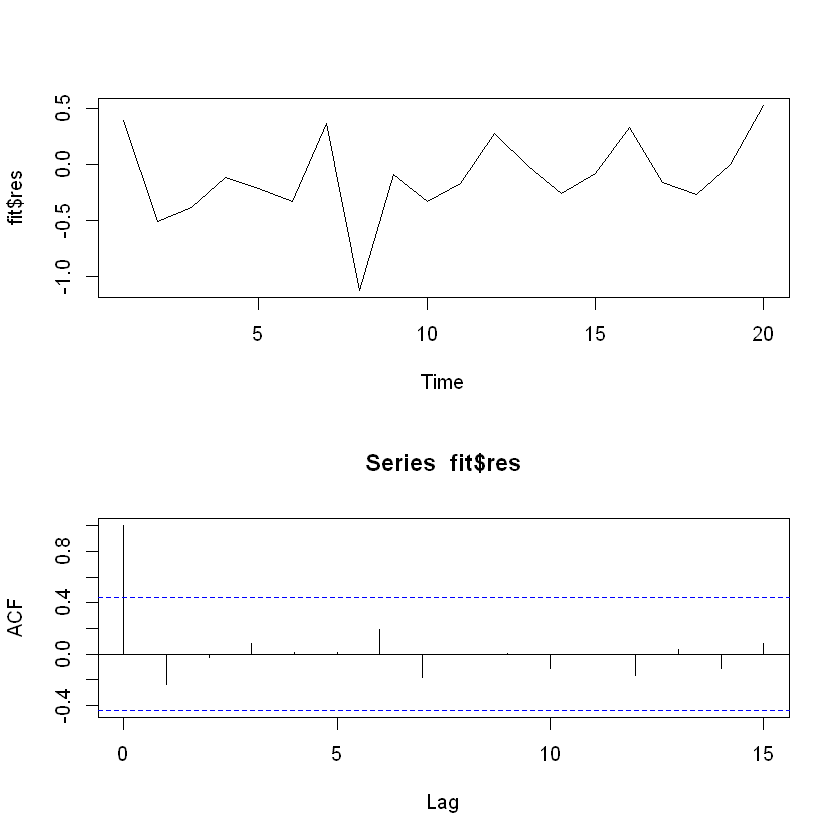

In [8]:
#Residual analysis
n=length(x)
fit=arima(x,order=c(4,0,4))
par(mfrow=c(2,1))
ts.plot(fit$ res)
r.z=as.numeric(acf(fit$ res,15)$ acf) 
portmanteau.stat=n*(n+2)*sum((r.z[-1]^2)/(n-(1:15)))
portmanteau.stat>qchisq(0.95,15-4-4) 

<br></br>
<p>Residual analysis can check the goodness of fit of the model. From R's result, it is fasle and fails to reject null hypothesis with 95% confidence interval. It implies that the model is good fit to the data.More, from time series plot of residual, it looks like white noises and from ACF plot of residual, it shows no significant autocorrelation. Thus, the goodness of fit is good in this model.</p>
<br></br>

## 4. Assignment 4

<p>To fit stock price of HSBC (0005.hk) to ARIMA model.</p>

Warning message:
"package 'tseries' is in use and will not be installed"Warning message:
"0005.hk contains missing values. Some functions will not work if objects contain missing values in the middle of the series. Consider using na.omit(), na.approx(), na.fill(), etc to remove or replace them."

time series starts 2012-01-03
time series ends   2016-12-30


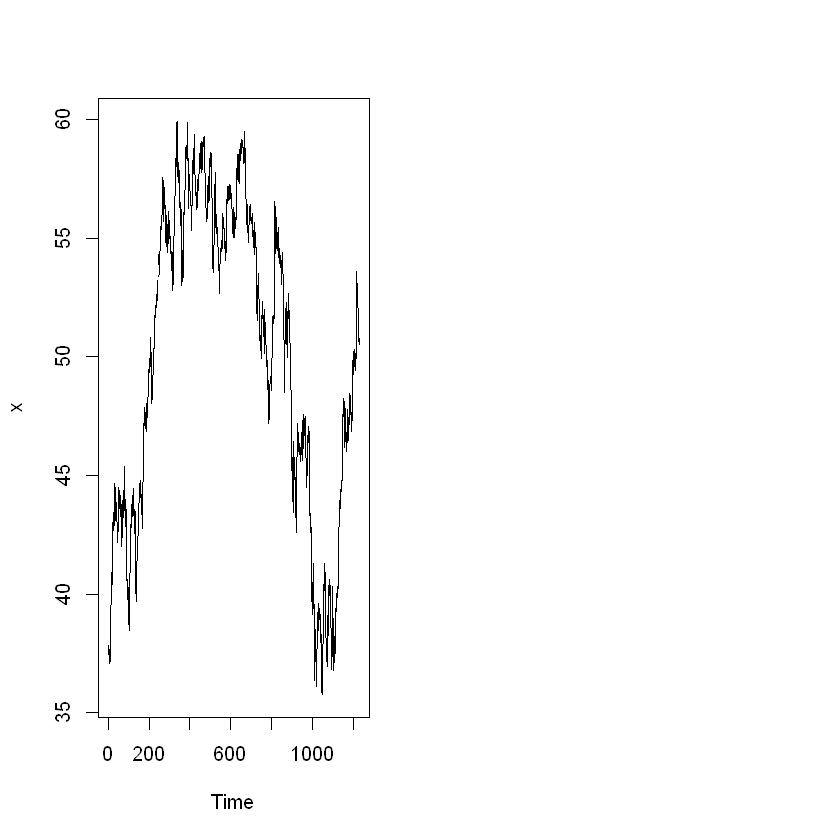

In [4]:
##Question 2
#Install packages
install.packages("tseries")
library("tseries")

#Download data
x=get.hist.quote(instrument="0005.hk", start="2012-01-01",
                 end="2016-12-31", quote=c("AdjClose"))
x=as.vector(x)

#Time Series and ACF of orginal data
par(mfrow=c(1,2))
plot.ts(x)

<br>
<p>In exploratory data analysis, from the time series plot, data is non-stationary. To conudct time series analysis, it needs to be stationary. Let's consider the difference in the lof of data.</p>
</br>

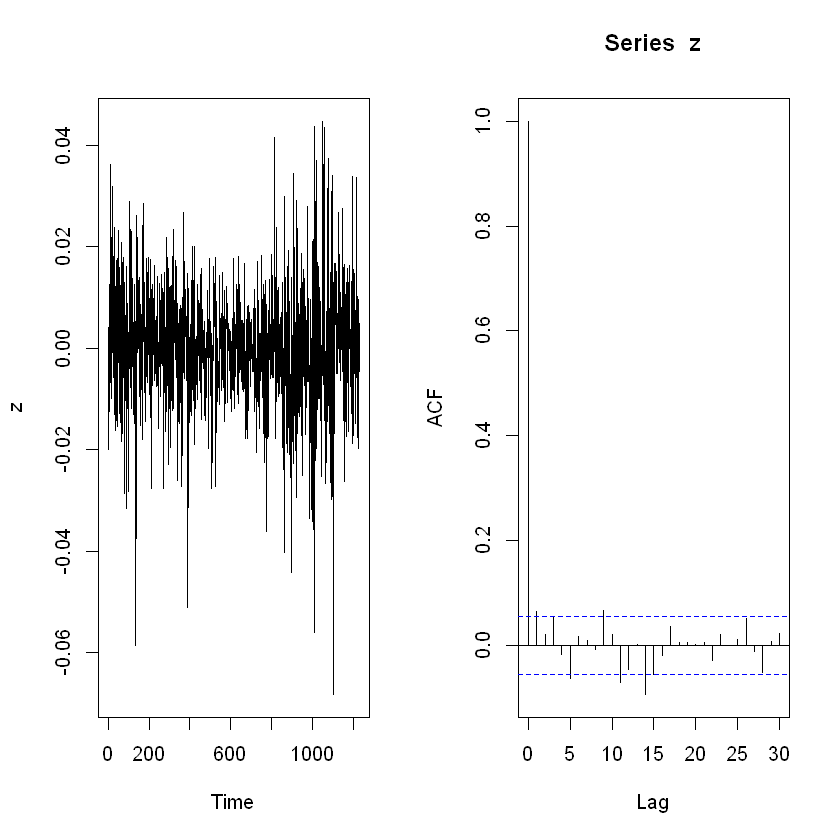

In [7]:
#Consider the difference in the log of data
y=log(x)
z=diff(y)
z[is.na(z)==T]=mean(z,na.rm = T)

#Time Series and ACF plot of transformed data
par(mfrow=c(1,2))
plot.ts(z)
acf(z)

<br>
<p>From the time series plot, the transformed data is stationary by time series plot. From ACF plot, there is strong autocorrelation at lag 0 and so it is possible to have AR(0), MA(0) or ARMA(0,0) models.</p>
</br>

also installing the dependencies 'fracdiff', 'lmtest', 'urca'




  There is a binary version available but the source version is later:
         binary source needs_compilation
forecast   8.14   8.15              TRUE

  Binaries will be installed
package 'fracdiff' successfully unpacked and MD5 sums checked
package 'lmtest' successfully unpacked and MD5 sums checked
package 'urca' successfully unpacked and MD5 sums checked
package 'forecast' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\cally\AppData\Local\Temp\RtmpYDtcpV\downloaded_packages


Warning message:
"package 'forecast' was built under R version 3.6.3"Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang


Series: z 
ARIMA(0,0,1) with zero mean 

Coefficients:
         ma1
      0.0632
s.e.  0.0281

sigma^2 estimated as 0.0001397:  log likelihood=3717.01
AIC=-7430.03   AICc=-7430.02   BIC=-7419.8

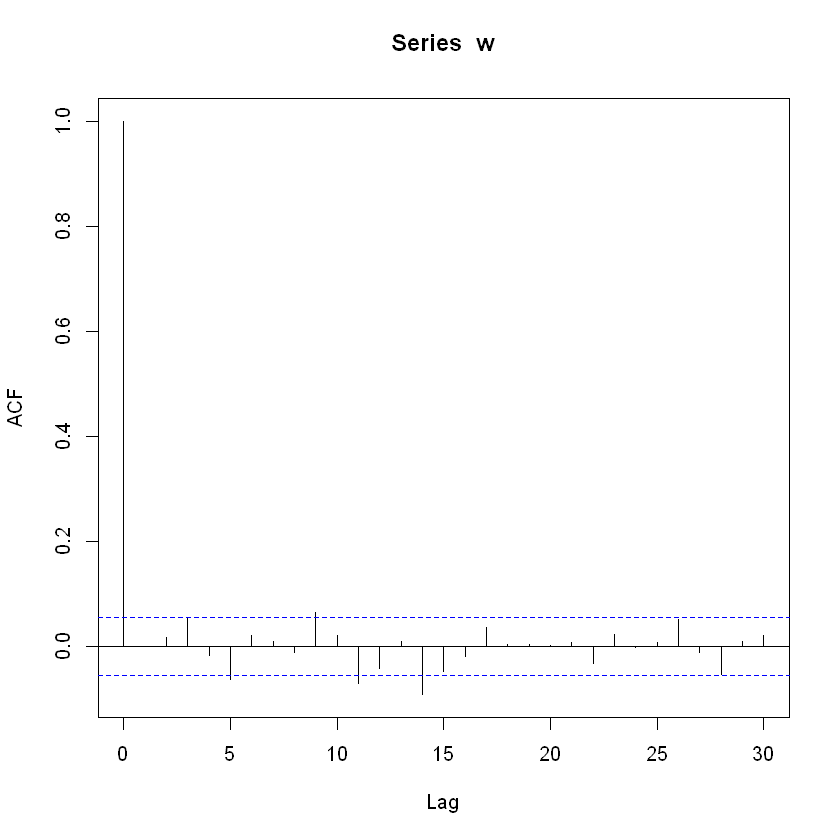

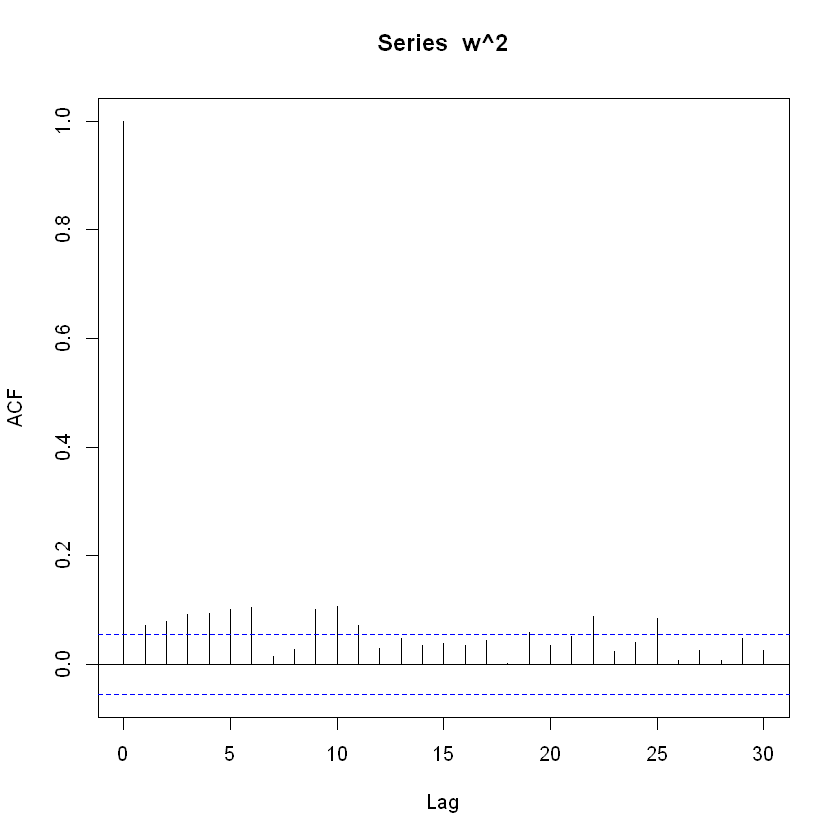

In [10]:
#ARIMA model to the log-price
#Install packages
install.packages("forecast")
library("forecast")

#ARIMA model
fit=auto.arima(z,ic=c("aic"),allowmean=F)
fit

#Residuals of ARIMA model
w=fit$res

#ACF plot of ARIMA model 
acf(w)
acf(w^2)

<p>In model identification and checking, from R's result, ARIMA(0,0,1) is selected with good AIC, AICc and BIC. More, the ACF plots show no significant autocorrelation. Thus, the goodness of fit is good in this model.</p>